In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

In [10]:
# Ruta al archivo CSV
archivo_csv = '../datasets/all-countries/threads_data_all-countries.csv'

df = pd.read_csv(archivo_csv)

In [12]:
#función para convertir "K" (miles) y "M" (millones) a números decimales
def convertir_a_decimal(valor):
    if isinstance(valor, str):
        if 'M' in valor:
            return float(valor.replace('M', '')) * 1_000_000
        elif 'K' in valor:
            return float(valor.replace('K', '')) * 1_000
    return float(valor)

# Suponiendo que df ya tiene las columnas cargadas
# Aplicar la función a las columnas 'FOLLOWERS' y 'POTENTIAL REACH'
df['FOLLOWERS'] = df['FOLLOWERS'].apply(convertir_a_decimal)
df['POTENTIAL REACH'] = df['POTENTIAL REACH'].apply(convertir_a_decimal)

In [13]:
# Función para convertir porcentajes a decimales
def convertir_porcentaje_a_decimal(valor):
    if isinstance(valor, str) and '%' in valor:
        # Eliminar el símbolo de porcentaje y convertir a decimal
        return float(valor.replace('%', '')) / 100
    return valor

# Aplicar la conversión a la columna ER
df['ER'] = df['ER'].apply(convertir_porcentaje_a_decimal)


In [14]:
# Unir todas las cadenas de texto de la columna 'TOPIC OF INFLUENCE' en un solo texto grande
texto_completo = ' '.join(df['TOPIC OF INFLUENCE'].dropna().astype(str))

# Limpiar el texto: eliminar caracteres especiales y convertir a minúsculas
texto_completo = re.sub(r'[^\w\s]', '', texto_completo).lower()

# Contar la frecuencia de cada palabra
contador_palabras = Counter(texto_completo.split())

# Opcional: si quieres eliminar palabras comunes o irrelevantes (stopwords), puedes hacer algo así:
stopwords = set(["and"])  # Agrega más según sea necesario
contador_palabras = {palabra: count for palabra, count in contador_palabras.items() if palabra not in stopwords}

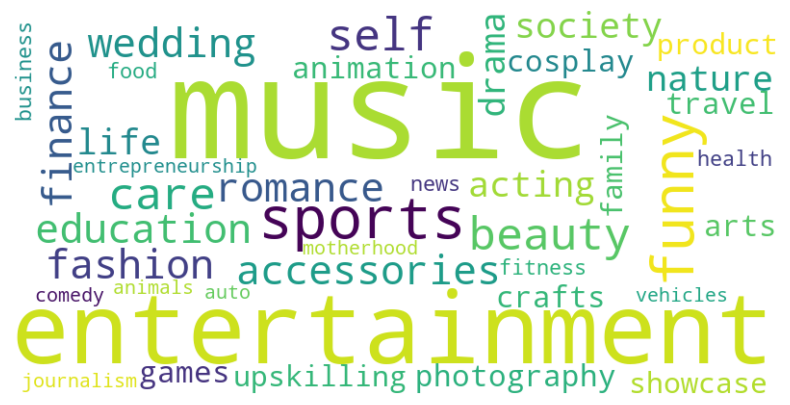

In [15]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(contador_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.show()

In [19]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,National Geographic @natgeo,4900000.0,0.0037,NaN,[Nature],1500000.0
1,2,Jennifer Lopez @jlo,3900000.0,0.0033,NaN,"[Entertainment , Music]",1200000.0
2,3,433 @433,3800000.0,0.003,NaN,[Sports],1100000.0
3,4,Ronaldo de Assis Moreira @ronaldinho,3000000.0,0.006,Brazil,[Sports],898100.0
4,5,Pubity @pubity,2800000.0,0.0024,NaN,"[Entertainment , Music]",830900.0
...,...,...,...,...,...,...,...
95,96,Eliana Michaelichen @eliana,882600.0,0.0036,Brazil,"[Entertainment , Music]",264800.0
96,97,Resiliência Humana @resiliencia_humana,871900.0,0.0014,NaN,"[Life , Society]",261600.0
97,98,Juliana Paes @julianapaes,870800.0,0.0009,NaN,"[Education Romance , Wedding Entertainment , ...",261200.0
98,99,NATTI NATASHA @nattinatasha,867400.0,0.0037,NaN,[Music],260200.0


In [21]:
# Separar la columna 'NAME' en dos columnas, utilizando el carácter '@' como separador
df[['NAME', 'USER']] = df['NAME'].str.split(' @', expand=True)

# Agregar el '@' al inicio de la columna 'USER'
df['USER'] = '@' + df['USER']

In [22]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,USER
0,1,National Geographic,4900000.0,0.0037,NaN,[Nature],1500000.0,@natgeo
1,2,Jennifer Lopez,3900000.0,0.0033,NaN,"[Entertainment , Music]",1200000.0,@jlo
2,3,433,3800000.0,0.003,NaN,[Sports],1100000.0,@433
3,4,Ronaldo de Assis Moreira,3000000.0,0.006,Brazil,[Sports],898100.0,@ronaldinho
4,5,Pubity,2800000.0,0.0024,NaN,"[Entertainment , Music]",830900.0,@pubity
...,...,...,...,...,...,...,...,...
95,96,Eliana Michaelichen,882600.0,0.0036,Brazil,"[Entertainment , Music]",264800.0,@eliana
96,97,Resiliência Humana,871900.0,0.0014,NaN,"[Life , Society]",261600.0,@resiliencia_humana
97,98,Juliana Paes,870800.0,0.0009,NaN,"[Education Romance , Wedding Entertainment , ...",261200.0,@julianapaes
98,99,NATTI NATASHA,867400.0,0.0037,NaN,[Music],260200.0,@nattinatasha


In [17]:
# Separar los valores en la columna 'TOPIC OF INFLUENCE' utilizando '&' como separador
df['TOPIC OF INFLUENCE'] = df['TOPIC OF INFLUENCE'].str.split('&')

# Convertir el DataFrame al formato long con explode
df_long = df.explode('TOPIC OF INFLUENCE')

# Eliminar espacios en blanco antes y después de las categorías
df_long['TOPIC OF INFLUENCE'] = df_long['TOPIC OF INFLUENCE'].str.strip()

In [23]:
df_long

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,National Geographic @natgeo,4900000.0,0.0037,NaN,Nature,1500000.0
1,2,Jennifer Lopez @jlo,3900000.0,0.0033,NaN,Entertainment,1200000.0
1,2,Jennifer Lopez @jlo,3900000.0,0.0033,NaN,Music,1200000.0
2,3,433 @433,3800000.0,0.003,NaN,Sports,1100000.0
3,4,Ronaldo de Assis Moreira @ronaldinho,3000000.0,0.006,Brazil,Sports,898100.0
...,...,...,...,...,...,...,...
97,98,Juliana Paes @julianapaes,870800.0,0.0009,NaN,Wedding Entertainment,261200.0
97,98,Juliana Paes @julianapaes,870800.0,0.0009,NaN,Music,261200.0
98,99,NATTI NATASHA @nattinatasha,867400.0,0.0037,NaN,Music,260200.0
99,100,Leo Dias @leodias,866300.0,0.0014,NaN,Entertainment,259900.0
